<a href="https://colab.research.google.com/github/Diegomjx/DDOS_DETECTOR/blob/master/DDOS_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DDOS Detector


In [21]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar y limpiar datos
df = pd.read_csv("DDoSdata.csv")
df = df.drop(['Unnamed: 0'], axis=1)
# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Codificar variables categóricas
le = LabelEncoder()
categorical_cols = ['flgs', 'proto', 'saddr', 'daddr', 'state', 'category', 'subcategory']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Cambiar valores hexadecimales en "sport" y "dport"
df.loc[df["sport"] == "0x0303", "sport"] = 303
df.loc[df["dport"] == "0x5000", "dport"] = 5000
df = df.astype(float)  # Convertir todo a flotantes

<ipython-input-21-5c6542db6c18>:16: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("DDoSdata.csv")



Resultados para Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    385462
         1.0       1.00      1.00      1.00    385188

    accuracy                           1.00    770650
   macro avg       1.00      1.00      1.00    770650
weighted avg       1.00      1.00      1.00    770650

Matriz de confusión:
[[385462      0]
 [     0 385188]]


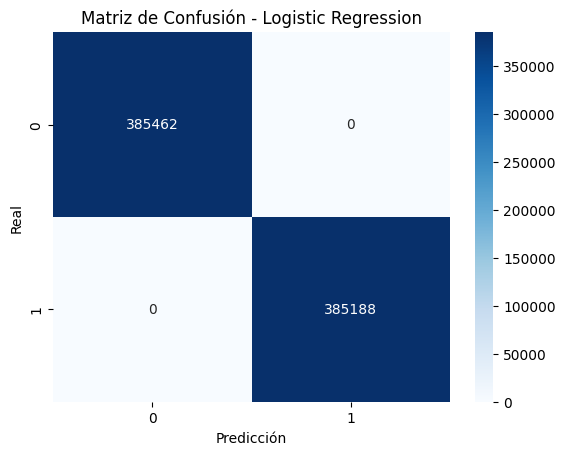


Resultados para Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    385462
         1.0       1.00      1.00      1.00    385188

    accuracy                           1.00    770650
   macro avg       1.00      1.00      1.00    770650
weighted avg       1.00      1.00      1.00    770650

Matriz de confusión:
[[385462      0]
 [     0 385188]]


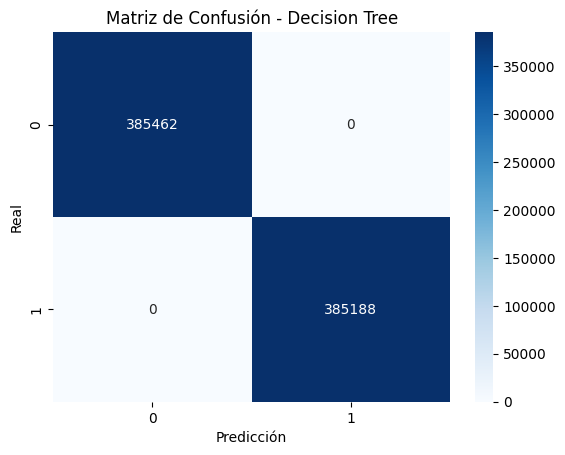


Resultados para Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    385462
         1.0       1.00      1.00      1.00    385188

    accuracy                           1.00    770650
   macro avg       1.00      1.00      1.00    770650
weighted avg       1.00      1.00      1.00    770650

Matriz de confusión:
[[385462      0]
 [     0 385188]]


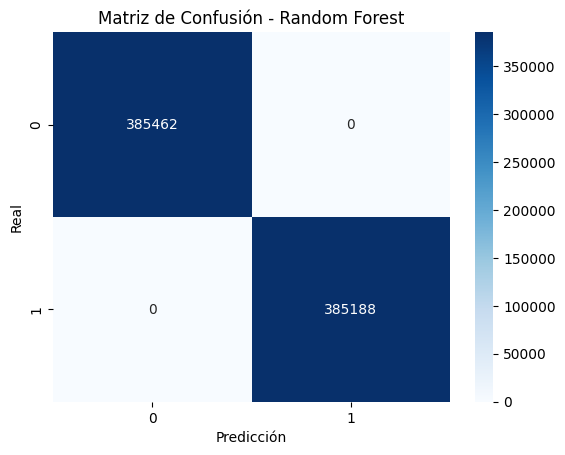


Accuracy Scores:
Logistic Regression: 1.0
Decision Tree: 1.0
Random Forest: 1.0


In [22]:
# Manejar el desbalance con SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=7)
X_resampled, y_resampled = smote.fit_resample( df.drop('category', axis=1), df['category'])

# Escalar características
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. Selección de características
# Usamos SelectKBest para seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# 4. Modelos mejorados
# Logistic Regression
logistic_model = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000)
logistic_model.fit(X_train_selected, y_train)
log_pred = logistic_model.predict(X_test_selected)

# Decision Tree
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train_selected, y_train)
dt_pred = DTClassifier.predict(X_test_selected)

# Random Forest
RFClassifier = RandomForestClassifier(n_estimators=100, random_state=0)  # Aumentamos n_estimators
RFClassifier.fit(X_train_selected, y_train)
rf_pred = RFClassifier.predict(X_test_selected)

# 5. Evaluación de modelos
# Función para mostrar métricas y matriz de confusión
def evaluate_model(name, y_test, y_pred):
    print(f"\nResultados para {name}:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión:")
    print(cm)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Evaluamos los modelos
evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)

# Imprimir precisión de cada modelo
print("\nAccuracy Scores:")
print("Logistic Regression:", accuracy_score(y_test, log_pred))
print("Decision Tree:", accuracy_score(y_test, dt_pred))
print("Random Forest:", accuracy_score(y_test, rf_pred))


In [18]:
print("Columnas utilizadas para el entrenamiento:")
print(X.columns)

Columnas utilizadas para el entrenamiento:
Index(['Unnamed: 0', 'pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto',
       'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes',
       'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum',
       'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate',
       'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack', 'subcategory'],
      dtype='object')


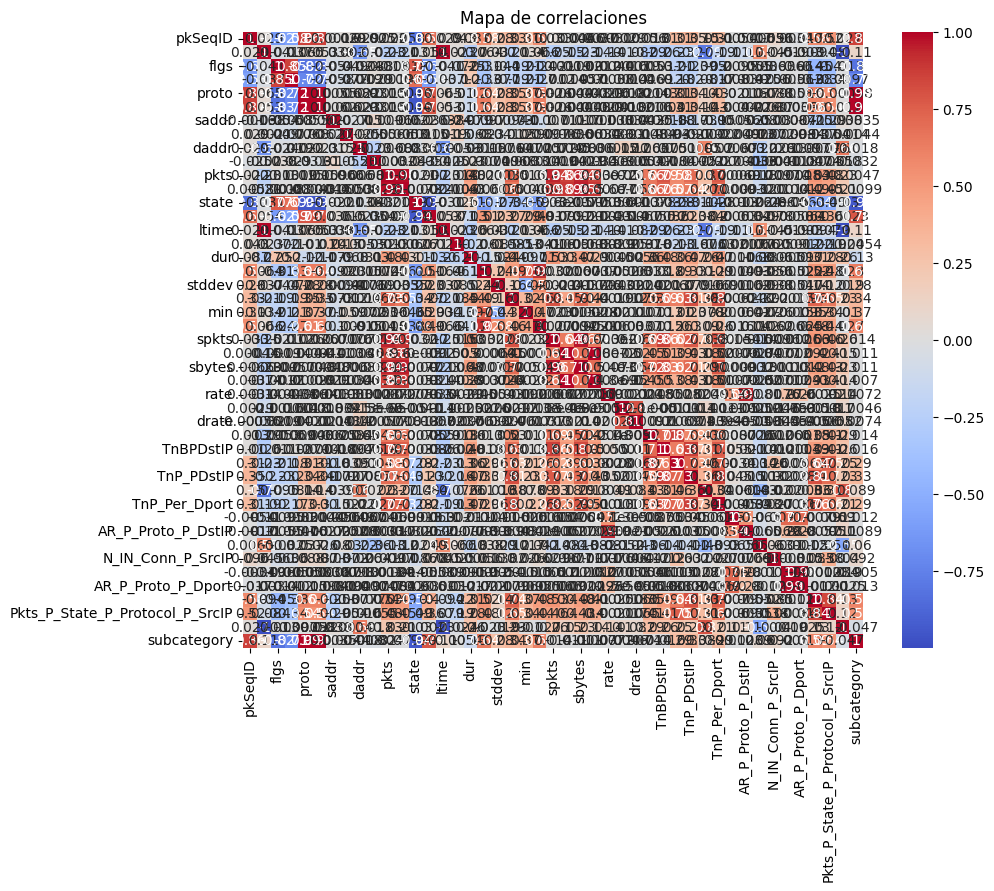

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de correlaciones")
plt.show()


In [23]:
print(df['category'].value_counts())

category
0.0    1926624
1.0        477
Name: count, dtype: int64
